# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
df_chipo=pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
df_chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


### Step 4. See the first 10 entries

In [4]:
df_chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

In [31]:
list_top5_items=df_chipo.groupby('item_name').quantity.sum().sort_values(ascending=False)[:5].index.to_list()
list_top5_items

['Chicken Bowl',
 'Chicken Burrito',
 'Chips and Guacamole',
 'Steak Burrito',
 'Canned Soft Drink']

In [42]:
df_chipo.groupby('item_name').quantity.sum()[list_top5_items]

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Steak Burrito          386
Canned Soft Drink      351
Name: quantity, dtype: int64

<AxesSubplot:xlabel='item_name'>

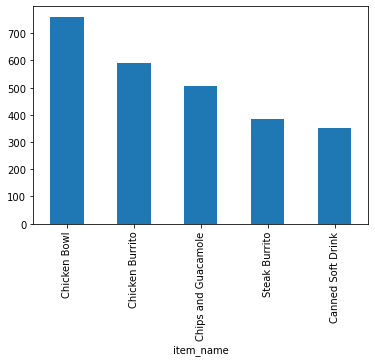

In [43]:
df_chipo.groupby('item_name').quantity.sum()[list_top5_items].plot.bar()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [98]:
df_group_item=pd.DataFrame(df_chipo.groupby(['item_name','item_price']).quantity.sum())
df_group_item

quantity
item_name         item_price          
6 Pack Soft Drink $12.98             2
                  $6.49             53
Barbacoa Bowl     $11.48             6
                  $11.49             1
                  $11.75            20
...                                ...
Veggie Salad Bowl $8.75              8
Veggie Soft Tacos $11.25             2
                  $16.98             2
                  $8.49              2
                  $8.75              2

[209 rows x 1 columns]

In [99]:
df_group_item.reset_index(inplace=True)
df_group_item

,item_name,item_price,quantity
0,6 Pack Soft Drink,$12.98,2
1,6 Pack Soft Drink,$6.49,53
2,Barbacoa Bowl,$11.48,6
3,Barbacoa Bowl,$11.49,1
4,Barbacoa Bowl,$11.75,20
...,...,...,...
204,Veggie Salad Bowl,$8.75,8
205,Veggie Soft Tacos,$11.25,2
206,Veggie Soft Tacos,$16.98,2
207,Veggie Soft Tacos,$8.49,2


In [113]:
df_group_item.item_price=df_group_item.item_price.apply(lambda x : float(x.replace('$','')))

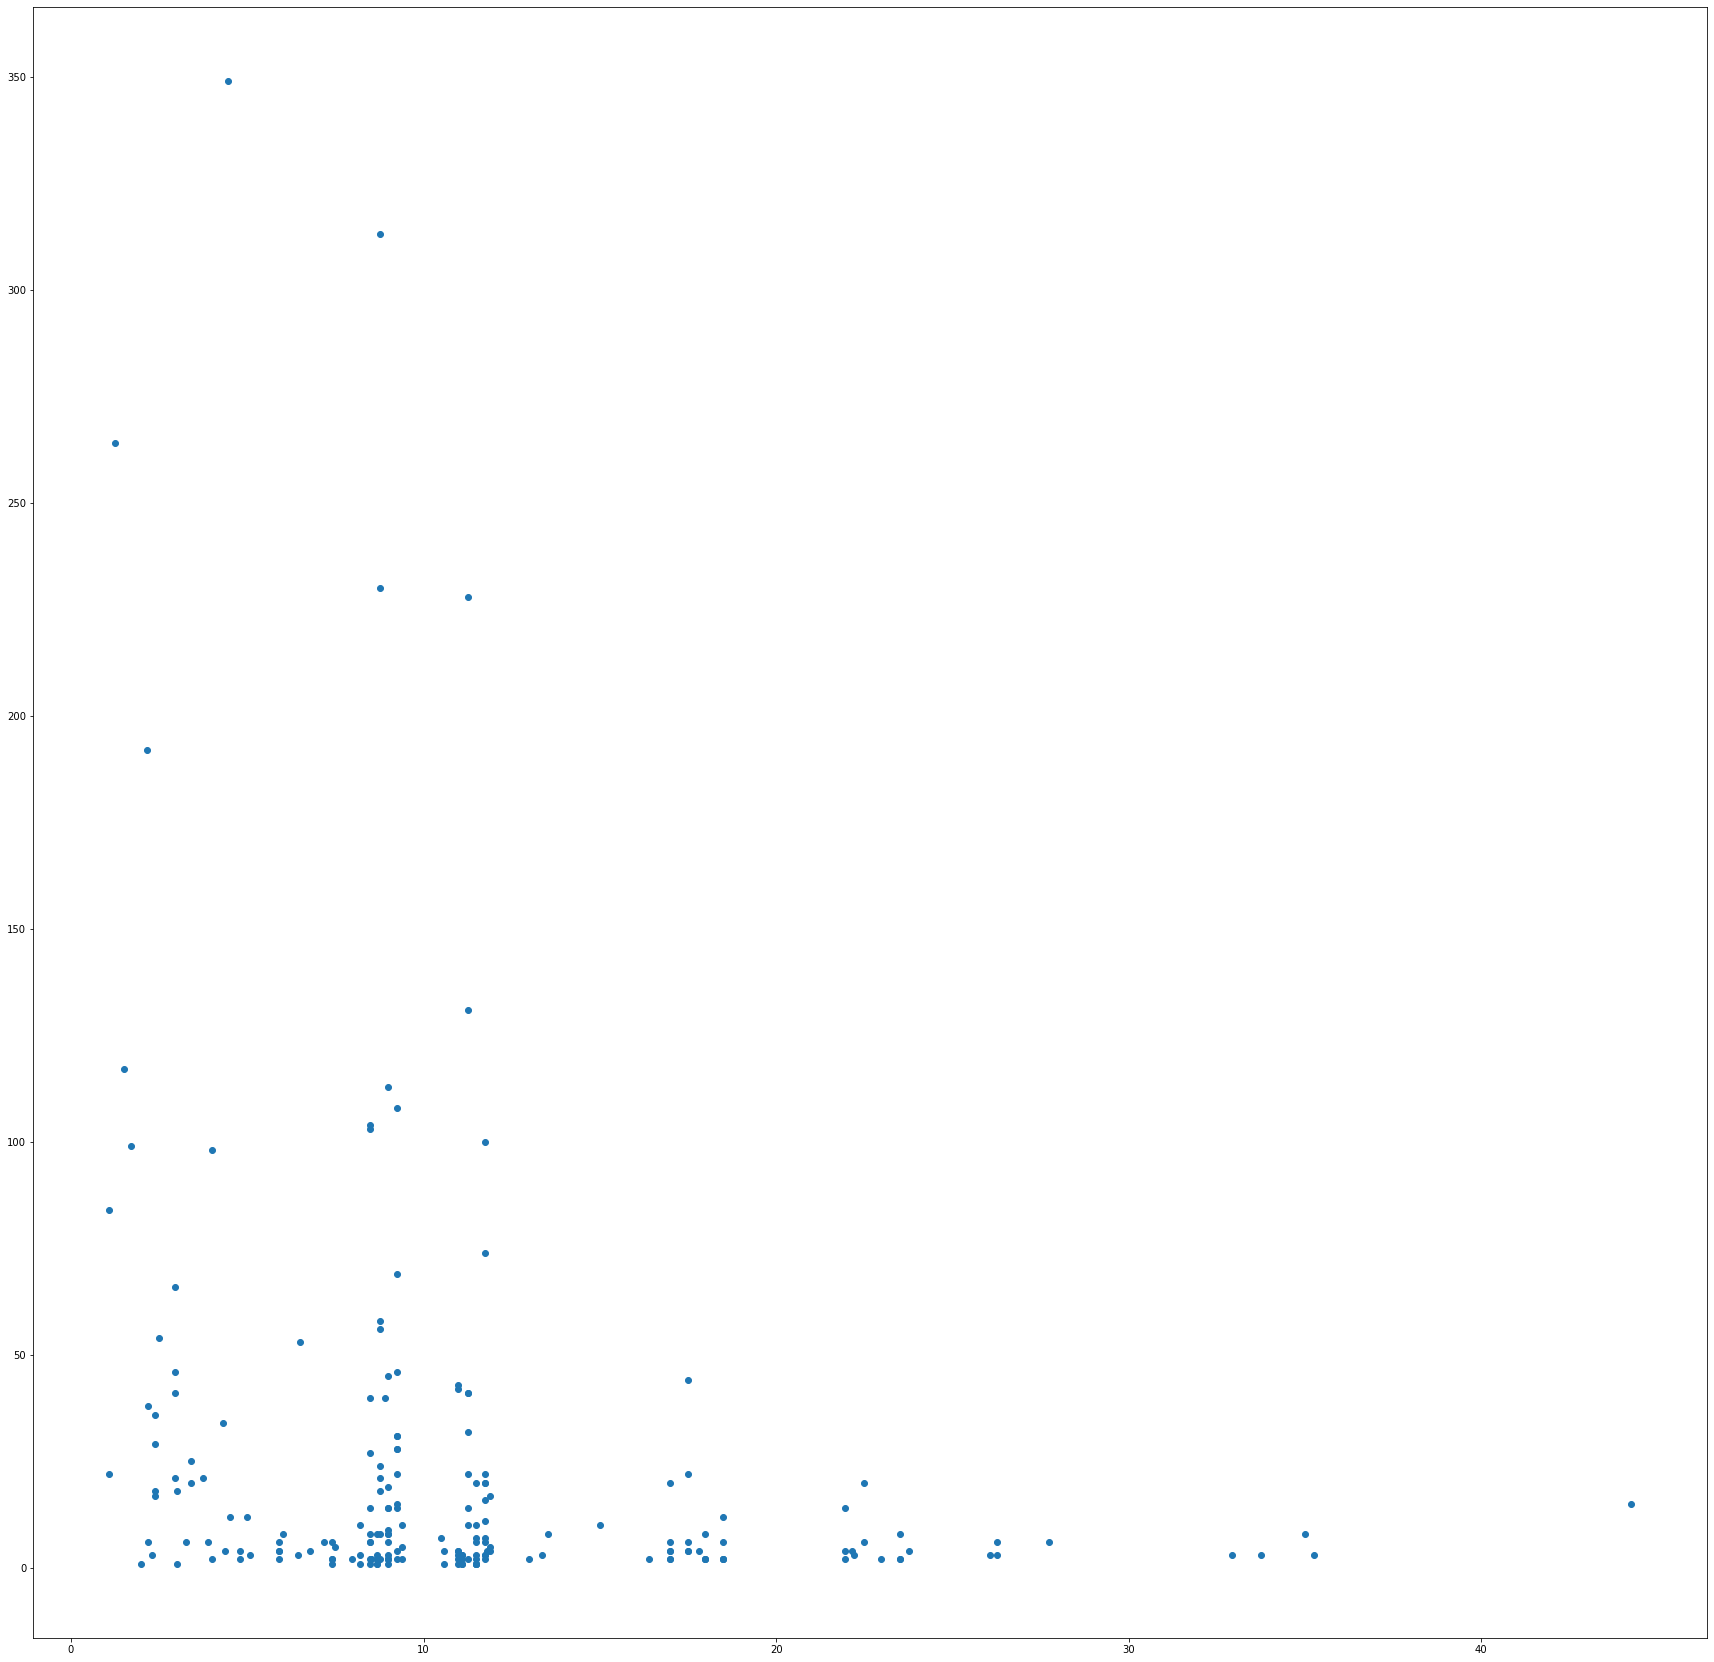

In [114]:
plt.figure(figsize=(30,30))
plt.scatter(x=df_group_item.item_price,y=df_group_item.quantity)

### Step 7. BONUS: Create a question and a graph to answer your own question.